#HAMOYE ID 147dff792b01f000

In [1]:
#import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
#load data

dataset = pd.read_csv('energydata_complete.csv')
dataset

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [3]:
#checking for missing data to avoid computational error
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
#check the first 10 value
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
#rename the columns for better understanding

rename = {'T1':'kitchen temperature', 'RH_1':'kitchen humidity', 'T2':'living room temperature', 'RH_2':'living room humidity', 'T3':'laundary temperature', 'RH_3':'laundary humidity', 'T4':'office temperature', 'RH_4':'office humidity', 'T5':'bathroom temperature', 'RH_5':'bathroom humidity', 'T6':'outside north temperature', 'RH_6':'outside north humidity', 'T7':'ironing room temperature', 'RH_7':'ironing room humidity', 'T8':'teenager room temperature', 'RH_8':'teenager room humidity', 'T9':'parents room temperature', 'RH_9':'parents room humidity', 'T_out':'outside station temperature', 'Press_mm_hg':'station pressure', 'RH_out':'outside station humidity', 'rv1':'random variable 1', 'rv2':'random variable 2'}

dataset = dataset.rename(columns=rename)
dataset

,date,Appliances,lights,kitchen temperature,kitchen humidity,living room temperature,living room humidity,laundary temperature,laundary humidity,office temperature,...,parents room temperature,parents room humidity,outside station temperature,station pressure,outside station humidity,Windspeed,Visibility,Tdewpoint,random variable 1,random variable 2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


<AxesSubplot:xlabel='living room temperature', ylabel='outside north temperature'>

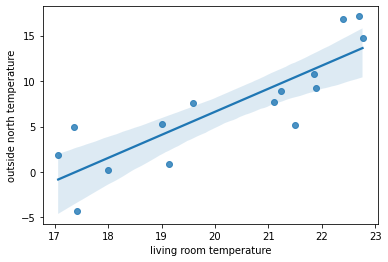

In [7]:
#select a sample advised and plot a linear regression
slr_data = dataset[['living room temperature', 'outside north temperature']].sample(15, random_state=2)

sns.regplot(x='living room temperature', y='outside north temperature', data=slr_data)


In [8]:
#fitting data into a model

target_df = dataset[['living room temperature', 'outside north temperature']]
x= target_df[['living room temperature']]
y = target_df[['outside north temperature']]
linear_model = LinearRegression().fit(x,y)
predict_x = linear_model.predict(x)
predict_x

array([[ 5.37165597],
       [ 5.37165597],
       [ 5.37165597],
       ...,
       [19.67562202],
       [19.19818742],
       [18.86506395]])

In [9]:
#get the value of r square

r2 = r2_score(y,predict_x )
round(r2, 2)

0.64

In [10]:
#drop two variables as instructed in the quiz which are date and lights
dataset = dataset.drop(columns=['date', 'lights'])
dataset

,Appliances,kitchen temperature,kitchen humidity,living room temperature,living room humidity,laundary temperature,laundary humidity,office temperature,office humidity,bathroom temperature,...,parents room temperature,parents room humidity,outside station temperature,station pressure,outside station humidity,Windspeed,Visibility,Tdewpoint,random variable 1,random variable 2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [11]:
#normalize data using the minmaxscaler
scaler = MinMaxScaler()
new_data = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
new_data

,Appliances,kitchen temperature,kitchen humidity,living room temperature,living room humidity,laundary temperature,laundary humidity,office temperature,office humidity,bathroom temperature,...,parents room temperature,parents room humidity,outside station temperature,station pressure,outside station humidity,Windspeed,Visibility,Tdewpoint,random variable 1,random variable 2
0,0.046729,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.074766,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.242991,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.383178,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [12]:
#seperate feature dataset before spliting
train_data = new_data.drop(['Appliances'], axis = 1)
y = new_data.Appliances
y

0        0.046729
1        0.046729
2        0.037383
3        0.037383
4        0.046729
           ...   
19730    0.084112
19731    0.074766
19732    0.242991
19733    0.383178
19734    0.392523
Name: Appliances, Length: 19735, dtype: float64

In [13]:
#splitting our dataset into test and train dataset

x_train, x_test, y_train, y_test = train_test_split(train_data, y, test_size = 0.3, random_state = 42)

In [14]:
#fit into a new model 
new_model = LinearRegression()
new_model.fit(x_train, y_train)
predicted_values = new_model.predict(x_test)
predicted_values

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [15]:
#calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.05

In [16]:
#Calculate the Residual Sum Of Squares
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.35

In [17]:
#calculate the Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)


0.088

In [18]:
#calculate the Rsquared value
r2 = r2_score(y_test, predicted_values)
round(r2, 2)

0.15

In [19]:
#define a function to get weights of features
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [20]:
#train data using ridge regression
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [21]:
#train data using lasso regression
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)



Lasso(alpha=0.001)

In [22]:
linear_model_weights = get_weights_df(new_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [23]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [24]:
#check for change in rsme
rmse2 = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse2, 3)

0.088

In [25]:
#get the feature with the maximum weight
final_weights.max()


Features               teenager room temperature
Linear_Model_Weight                     0.553547
Ridge_Weight                            0.511932
Lasso_weight                             0.01788
dtype: object

In [26]:
#get the feature with the minimum weight 
final_weights.min()

Features               Tdewpoint
Linear_Model_Weight    -0.456698
Ridge_Weight           -0.401134
Lasso_weight           -0.049557
dtype: object

the feature with the minimum weight is tdewpoint

In [27]:
#train lasso with a new alpha value as given in the quiz
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [28]:
#check the weight for non zero feature weights
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,living room humidity,-0.456698,-0.401134,-0.000000
1,outside station temperature,-0.321860,-0.250765,0.000000
2,living room temperature,-0.236178,-0.193880,0.000000
3,parents room temperature,-0.189941,-0.188584,-0.000000
4,teenager room humidity,-0.157595,-0.156596,-0.000110
5,outside station humidity,-0.077671,-0.050541,-0.049557
6,ironing room humidity,-0.044614,-0.046291,-0.000000
7,parents room humidity,-0.039800,-0.041701,-0.000000
8,bathroom temperature,-0.015657,-0.020727,-0.000000
9,kitchen temperature,-0.003281,-0.021549,0.000000


In [29]:
#find the new rmse with lasso and check if it changed
rmse3 = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse3, 3)

0.088

the new rmse did not change